In [1]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
from sklearn.metrics import classification_report
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
import sys
sys.path.append('../src')
from model.proba_model import get_past_meta, predict
from model.evaluation import get_classification_report

In [3]:
import sys
sys.path.append('../src')
from data.data_split import split_data_by_year
from features.contigency_table import create_contigency_table
from model.proba_model import get_past_meta, predict
from model.evaluation import get_classification_report

In [4]:
# ### Definitions
path_data_dir = '../data/'

list_assets = ["PETR3.SA","PRIO3.SA", "VALE3.SA", "GGBR3.SA", "ABCB4.SA", "ITUB3.SA", "FLRY3.SA", "RADL3.SA"]

relevant_cols = ['Date', 'Close', 'Volume']

In [ ]:
def get_probability(past_meta_list, df_probas):
    
    metas = df_probas.index.tolist()
    
    dict_probas = {} 
    for meta in metas:
        
        for past_meta in meta_list:
            
        
          dict_probas.update({meta:})
        
        
    
    probas_list = []
    for meta in past_meta_list:
        
        dict_probas = df_probas.loc[meta].to_dict()
        
        # get the meta with greater proba
        pred_meta = max(dict_probas, key=dict_probas.get)
        
        probas_list.append(pred_meta)
        
        
        
        

In [5]:
df_results = pd.DataFrame({})

for n_prev_meta in tqdm(range(2, 3)):

    for asset in list_assets:
        
        # get train dataset
        train_dataset = pd.read_csv(path_data_dir + f"processed/train_price_history_{asset.replace('.', '_')}_meta_dataset_ffill.csv", index_col= 0)
        # get test dataset
        test_dataset = pd.read_csv(path_data_dir + f"processed/test_price_history_{asset.replace('.', '_')}_meta_dataset_ffill.csv", index_col= 0)
        
        # get train contigency table (as probability)
        df_probas = create_contigency_table(
            data = train_dataset,
            n_prev_meta = 1,
            progress_bar=False,
            as_probability=True
        )
        
        # get the past meta for all days    
        test_dataset["past_meta"] = test_dataset.apply(lambda x: get_past_meta(test_dataset,x,n_prev_meta,name_meta_col = "meta"), axis=1)

        # remove the first rows
        test_dataset = test_dataset.iloc[n_prev_meta:]
                
        # get X_test 
        X_test = test_dataset.past_meta
        X_test = [list(X) for X in X_test] # tuple to list
        
        # get y_test
        y_test = test_dataset.meta
        
        # predict based on probability table
        y_pred = test_dataset.past_meta.apply(lambda x: predict(x, df_probas))
                
        # when the value is nan, repeat the last predict
        y_pred.ffill(inplace=True)
        y_pred.fillna(0, inplace = True)
        
        # create df with results
        df_results_p = get_classification_report(y_test, y_pred)
        df_results_p['asset'] = asset
        df_results_p['n_prev_meta'] = n_prev_meta
        
        df_results = pd.concat([df_results, df_results_p])

  0%|          | 0/1 [00:00<?, ?it/s]


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [ ]:
X_test

3919    (-1, -1, -1, -1)
3920    (-1, -1, -1, -1)
3921     (-1, -1, -1, 0)
3922      (-1, -1, 0, 0)
3923       (-1, 0, 0, 0)
              ...       
4889        (1, 1, 1, 1)
4890        (1, 1, 1, 1)
4891        (1, 1, 1, 1)
4892        (1, 1, 1, 1)
4893        (1, 1, 1, 0)
Name: past_meta, Length: 975, dtype: object

[['-1', '-1', '-1', '-1'],
 ['-1', '-1', '-1', '-1'],
 ['-1', '-1', '-1', '0'],
 ['-1', '-1', '0', '0'],
 ['-1', '0', '0', '0'],
 ['0', '0', '0', '0'],
 ['0', '0', '0', '0'],
 ['0', '0', '0', '1'],
 ['0', '0', '1', '2'],
 ['0', '1', '2', '1'],
 ['1', '2', '1', '0'],
 ['2', '1', '0', '2'],
 ['1', '0', '2', '2'],
 ['0', '2', '2', '2'],
 ['2', '2', '2', '1'],
 ['2', '2', '1', '1'],
 ['2', '1', '1', '0'],
 ['1', '1', '0', '0'],
 ['1', '0', '0', '0'],
 ['0', '0', '0', '0'],
 ['0', '0', '0', '0'],
 ['0', '0', '0', '0'],
 ['0', '0', '0', '0'],
 ['0', '0', '0', '0'],
 ['0', '0', '0', '1'],
 ['0', '0', '1', '0'],
 ['0', '1', '0', '0'],
 ['1', '0', '0', '0'],
 ['0', '0', '0', '1'],
 ['0', '0', '1', '1'],
 ['0', '1', '1', '2'],
 ['1', '1', '2', '2'],
 ['1', '2', '2', '1'],
 ['2', '2', '1', '1'],
 ['2', '1', '1', '1'],
 ['1', '1', '1', '0'],
 ['1', '1', '0', '0'],
 ['1', '0', '0', '1'],
 ['0', '0', '1', '1'],
 ['0', '1', '1', '2'],
 ['1', '1', '2', '2'],
 ['1', '2', '2', '2'],
 ['2', '2', '2', '2'

In [ ]:
test_dataset

,Date,Close,Volume,SMA_21,MSTD_21,Day_of_week,Weekend,Invalid_Days,diff_close_mean,diff_close_mean_z_score,meta,past_meta
3916,2021-08-14,29.920000,14005900.0,28.116667,0.930163,5,1,1,1.803333,1.938728,1,1
3917,2021-08-15,29.920000,14005900.0,28.116667,0.930163,6,1,1,1.803333,1.938728,1,1
3918,2021-08-16,29.350000,14341000.0,28.220476,0.940816,0,0,0,1.129524,1.200579,1,1
3919,2021-08-17,27.750000,20573000.0,28.263333,0.894630,1,0,0,-0.513333,-0.573794,0,1
3920,2021-08-18,27.420000,15096100.0,28.269524,0.887983,2,0,0,-0.849524,-0.956689,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4889,2024-04-13,40.299999,10318000.0,38.312381,1.487245,5,1,1,1.987618,1.336443,1,1
4890,2024-04-14,40.299999,10318000.0,38.312381,1.487245,6,1,1,1.987618,1.336443,1,1
4891,2024-04-15,40.889999,13367800.0,38.509524,1.543128,0,0,0,2.380476,1.542630,1,1
4892,2024-04-16,41.090000,10944200.0,38.720000,1.580658,1,0,0,2.370000,1.499376,1,1


In [ ]:
df_results

,precision,recall,f1-score,support,asset,n_prev_meta
0,0.846983,0.846983,0.846983,464.000000,PETR3.SA,1
accuracy,0.787321,0.787321,0.787321,0.787321,PETR3.SA,1
weighted avg,0.783856,0.787321,0.785531,978.000000,PETR3.SA,1
-1,0.771429,0.771429,0.771429,175.000000,PETR3.SA,1
1,0.769874,0.769874,0.769874,239.000000,PETR3.SA,1
...,...,...,...,...,...,...
-1,0.633333,0.633333,0.633333,180.000000,RADL3.SA,2
-2,0.645833,0.620000,0.632653,50.000000,RADL3.SA,2
macro avg,0.539084,0.509978,0.521373,977.000000,RADL3.SA,2
2,0.550000,0.366667,0.440000,30.000000,RADL3.SA,2


In [ ]:
test_dataset

,Date,Close,Volume,SMA_21,MSTD_21,Day_of_week,Weekend,Invalid_Days,diff_close_mean,diff_close_mean_z_score,meta,past_meta
3917,2021-08-15,24.884615,3807856.0,25.092033,0.510346,6,1,1,-0.207418,-0.406426,0,"(0, 0)"
3918,2021-08-16,24.769230,4503408.0,25.031135,0.464831,0,0,0,-0.261905,-0.563442,0,"(0, 0)"
3919,2021-08-17,24.423077,6169904.0,24.976648,0.465900,1,0,0,-0.553571,-1.188175,-1,"(0, 0)"
3920,2021-08-18,24.326923,5589168.0,24.930861,0.480737,2,0,0,-0.603937,-1.256275,-1,"(0, -1)"
3921,2021-08-19,25.211538,5636176.0,24.911630,0.459597,3,0,0,0.299909,0.652546,0,"(-1, -1)"
...,...,...,...,...,...,...,...,...,...,...,...,...
4889,2024-04-13,26.360001,6572900.0,26.945714,0.559612,5,1,1,-0.585714,-1.046642,-1,"(-1, -1)"
4890,2024-04-14,26.360001,6572900.0,26.945714,0.559612,6,1,1,-0.585714,-1.046642,-1,"(-1, -1)"
4891,2024-04-15,26.200001,6162400.0,26.910000,0.582778,0,0,0,-0.709999,-1.218302,-1,"(-1, -1)"
4892,2024-04-16,25.219999,7498900.0,26.825238,0.688830,1,0,0,-1.605239,-2.330385,-2,"(-1, -1)"


In [ ]:
cont_tbl_train

Meta -1 -3 -2             -1              0  ...    1       2              3  \
Meta -2 -1 -3  -2  -1  0  -2   -1   0  1 -2  ...    1   2   0   1    2  3 -1   
Meta                                         ...                               
-3       0  0   0   0  0   0    2   1  0  0  ...    0   0   0   0    0  0  0   
-2       3  2  85  27  5   5   24  17  0  0  ...    0   0   0   0    0  0  0   
-1       0  1  33  17  1  34  366  79  0  0  ...    1   0   0   0    0  0  0   
 0       0  0   1   2  0  13   86  38  1  3  ...  121  14   0   0    4  0  0   
 1       0  0   0   0  0   0    1   0  0  0  ...  537  67   3  37   48  2  0   
 2       0  0   0   0  0   0    0   0  0  0  ...   47   9  16  35  108  3  0   
 3       0  0   0   0  0   0    0   1  0  0  ...    2   0   0   0    2  0  1   

Meta -1           
Meta -2  1  2  3  
Meta              
-3       0  0  0  
-2       0  0  0  
-1       0  0  0  
 0       0  0  0  
 1       0  0  0  
 2       0  2  3  
 3       2  0  2  

[7 rows x 26 columns]

In [ ]:
df_probas

Meta -1   -3        -2                                      -1            \
Meta -2   -1        -3        -2        -1         0        -2        -1   
Meta                                                                       
-3       0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.004175   
-2       1.0  0.666667  0.714286  0.586957  0.833333  0.096154  0.050104   
-1       0.0  0.333333  0.277311  0.369565  0.166667  0.653846  0.764092   
 0       0.0  0.000000  0.008403  0.043478  0.000000  0.250000  0.179541   
 1       0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.002088   
 2       0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 3       0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Meta -1                   0  ...         1                   2            \
Meta -2         0    1   -2  ...         1         2         0         1   
Meta                         ...                                           
-3       0.007353  0.0  0.0  ...  0.000000  0.000000  0.000000  0.000000   
-2       0.125000  0.0  0.0  ...  0.000000  0.000000  0.000000  0.000000   
-1       0.580882  0.0  0.0  ...  0.001412  0.000000  0.000000  0.000000   
 0       0.279412  1.0  1.0  ...  0.170904  0.155556  0.000000  0.000000   
 1       0.000000  0.0  0.0  ...  0.758475  0.744444  0.157895  0.513889   
 2       0.000000  0.0  0.0  ...  0.066384  0.100000  0.842105  0.486111   
 3       0.007353  0.0  0.0  ...  0.002825  0.000000  0.000000  0.000000   

Meta -1                   3                 
Meta -2         2    3   -1    1    2    3  
Meta                                        
-3       0.000000  0.0  0.0  0.0  0.0  0.0  
-2       0.000000  0.0  0.0  0.0  0.0  0.0  
-1       0.000000  0.0  0.0  0.0  0.0  0.0  
 0       0.024691  0.0  0.0  0.0  0.0  0.0  
 1       0.296296  0.4  0.0  0.0  0.0  0.0  
 2       0.666667  0.6  0.0  0.0  1.0  0.6  
 3       0.012346  0.0  1.0  1.0  0.0  0.4  

[7 rows x 26 columns]

In [ ]:
df_results= df_results.reset_index().rename({'index': 'class'}, axis = 1)
df_results

,class,precision,recall,f1-score,support,asset,n_prev_meta
0,0,0.846983,0.846983,0.846983,464.000000,PETR3.SA,1
1,accuracy,0.787321,0.787321,0.787321,0.787321,PETR3.SA,1
2,weighted avg,0.783856,0.787321,0.785531,978.000000,PETR3.SA,1
3,-1,0.771429,0.771429,0.771429,175.000000,PETR3.SA,1
4,1,0.769874,0.769874,0.769874,239.000000,PETR3.SA,1
...,...,...,...,...,...,...,...
1582,macro avg,0.137887,0.156122,0.144759,959.000000,RADL3.SA,20
1583,-1,0.117117,0.073034,0.089965,178.000000,RADL3.SA,20
1584,-2,0.000000,0.000000,0.000000,50.000000,RADL3.SA,20
1585,2,0.000000,0.000000,0.000000,30.000000,RADL3.SA,20


In [ ]:
df_f1_macro = df_results[
    (df_results['class'] == 'macro avg') &
    (df_results['n_prev_meta'] != 'DUMMY')
    ][['f1-score', 'asset' ,'n_prev_meta']]
df_f1_macro

,f1-score,asset,n_prev_meta
7,0.507931,PETR3.SA,1
24,0.740448,PRIO3.SA,1
43,0.621226,VALE3.SA,1
63,0.557122,GGBR3.SA,1
83,0.571628,ABCB4.SA,1
...,...,...,...
1543,0.096166,GGBR3.SA,20
1553,0.111083,ABCB4.SA,20
1563,0.148564,ITUB3.SA,20
1574,0.166896,FLRY3.SA,20


<Axes: xlabel='n_prev_meta', ylabel='f1-score'>

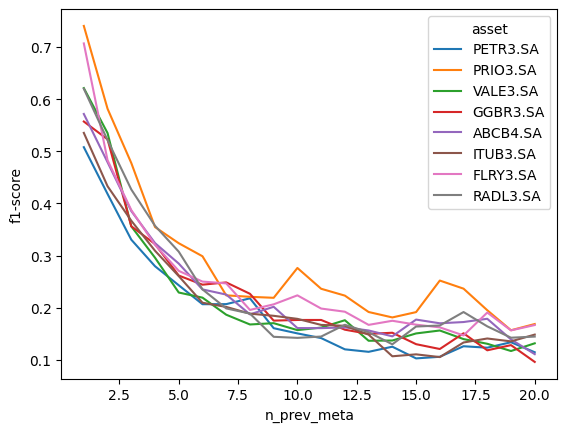

In [ ]:
sns.lineplot(data=df_f1_macro, x="n_prev_meta", y="f1-score", hue="asset")

In [ ]:
df_results[
    (df_results['class'] == 'macro avg') &
    (df_results['n_prev_meta'] == 'DUMMY')
    ][['f1-score', 'asset' ,'n_prev_meta']].sort_values('asset')

,f1-score,asset,n_prev_meta
92,0.569987,ABCB4.SA,DUMMY
128,0.706896,FLRY3.SA,DUMMY
73,0.652389,GGBR3.SA,DUMMY
111,0.533842,ITUB3.SA,DUMMY
15,0.697414,PETR3.SA,DUMMY
32,0.740448,PRIO3.SA,DUMMY
147,0.612325,RADL3.SA,DUMMY
53,0.690939,VALE3.SA,DUMMY


In [ ]:
df_results[
    (df_results['class'] == 'macro avg') &
    (df_results['n_prev_meta'] == 1)
    ][['f1-score', 'asset' ,'n_prev_meta']].sort_values('asset')

,f1-score,asset,n_prev_meta
83,0.571628,ABCB4.SA,1
119,0.706896,FLRY3.SA,1
63,0.557122,GGBR3.SA,1
101,0.535368,ITUB3.SA,1
7,0.507931,PETR3.SA,1
24,0.740448,PRIO3.SA,1
138,0.620031,RADL3.SA,1
43,0.621226,VALE3.SA,1
